# **Restaurant Inspections New York City**

## **Imports**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
%matplotlib inline
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords

#Sklearn preprocessing
from sklearn import preprocessing,set_config
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,StandardScaler,LabelEncoder
#Scipy
from scipy import stats
from scipy.stats import norm

#Sklearn Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn import preprocessing, set_config
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,make_column_selector,make_column_transformer
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.decomposition import PCA


# Warnings 
import warnings 
warnings.filterwarnings("ignore")

# Configuring diagrams
set_config(display = 'diagram')

# **Load Data**

In [2]:
rd = pd.read_csv('https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD')

# **Data Exploration**


In [3]:
# Check to see if data loaded properly:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206676 entries, 0 to 206675
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  206676 non-null  int64  
 1   DBA                    206250 non-null  object 
 2   BORO                   206676 non-null  object 
 3   BUILDING               206294 non-null  object 
 4   STREET                 206672 non-null  object 
 5   ZIPCODE                203971 non-null  float64
 6   PHONE                  206669 non-null  object 
 7   CUISINE DESCRIPTION    204494 non-null  object 
 8   INSPECTION DATE        206676 non-null  object 
 9   ACTION                 204494 non-null  object 
 10  VIOLATION CODE         203353 non-null  object 
 11  VIOLATION DESCRIPTION  203353 non-null  object 
 12  CRITICAL FLAG          206676 non-null  object 
 13  SCORE                  197182 non-null  float64
 14  GRADE                  102361 non-nu

In [4]:
# Check to see if data loaded properly:
rd.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50129800,NaN,Manhattan,1164,1 AVENUE,10065.0,9175766999,NaN,01/01/1900,NaN,...,NaN,40.762580,-73.959790,108.0,5.0,10602.0,1045388.0,1.014580e+09,MN31,NaN
1,50126573,NaN,Manhattan,42 W,42ND ST,10036.0,7187901106,NaN,01/01/1900,NaN,...,NaN,40.754068,-73.982321,105.0,4.0,8400.0,1085593.0,1.012570e+09,MN17,NaN
2,50098126,HUMAN RESOURCES,Manhattan,26,VANDERBILT AVENUE,10017.0,2128504378,NaN,01/01/1900,NaN,...,NaN,40.753277,-73.977756,105.0,4.0,9400.0,1035360.0,1.012780e+09,MN17,NaN
3,50112175,BLACK LAB COFFEE,Manhattan,420,AMSTERDAM AVENUE,10024.0,9178556467,NaN,01/01/1900,NaN,...,NaN,40.783972,-73.977731,107.0,6.0,16700.0,1032663.0,1.012280e+09,MN12,NaN
4,50139124,NaN,Queens,3302,34TH AVE,11106.0,3478699824,NaN,01/01/1900,NaN,...,NaN,40.758846,-73.925526,401.0,26.0,5700.0,4008233.0,4.006100e+09,QN70,NaN


## **Drop Columns**

In [5]:
# Dropping irrelevant of imcomplete columns
rd.drop(['Location Point1', 'PHONE', 'BBL', 'BIN', 'NTA', 'Census Tract', 'Community Board', 'RECORD DATE'], axis=1, inplace=True)

In [6]:
# Checking to see if columns dropped 
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206676 entries, 0 to 206675
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  206676 non-null  int64  
 1   DBA                    206250 non-null  object 
 2   BORO                   206676 non-null  object 
 3   BUILDING               206294 non-null  object 
 4   STREET                 206672 non-null  object 
 5   ZIPCODE                203971 non-null  float64
 6   CUISINE DESCRIPTION    204494 non-null  object 
 7   INSPECTION DATE        206676 non-null  object 
 8   ACTION                 204494 non-null  object 
 9   VIOLATION CODE         203353 non-null  object 
 10  VIOLATION DESCRIPTION  203353 non-null  object 
 11  CRITICAL FLAG          206676 non-null  object 
 12  SCORE                  197182 non-null  float64
 13  GRADE                  102361 non-null  object 
 14  GRADE DATE             92637 non-nul

## **Checking for missing data**

In [7]:
# checking missing data in data 
def check_missing_data(df):
    total = df.isnull().sum().sort_values(ascending=True)
    percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=True)
    percent = percent.round(2).astype(str) + '%'  # Add the percentage sign
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data_result = check_missing_data(rd)
print(missing_data_result.head)

<bound method NDFrame.head of                         Total Percent
CAMIS                       0    0.0%
BORO                        0    0.0%
INSPECTION DATE             0    0.0%
CRITICAL FLAG               0    0.0%
STREET                      4    0.0%
Longitude                 253   0.12%
Latitude                  253   0.12%
BUILDING                  382   0.18%
DBA                       426   0.21%
CUISINE DESCRIPTION      2182   1.06%
ACTION                   2182   1.06%
INSPECTION TYPE          2182   1.06%
ZIPCODE                  2705   1.31%
Council District         3319   1.61%
VIOLATION DESCRIPTION    3323   1.61%
VIOLATION CODE           3323   1.61%
SCORE                    9494   4.59%
GRADE                  104315  50.47%
GRADE DATE             114039  55.18%>


## **Clean up Names of Restaurants**

In [8]:
# Function to clean restaurant names
def clean_restaurant_name(name):
    # check if the input is a string 
    if isinstance(name, str):
        # Remove store numbers using regular expression 
        cleaned_name = re.sub(r'#\d+','', name)
        # Remove all numeric characters 
        cleaned_name = re.sub(r'#\d+', '', cleaned_name)
        #Remove leading and trailing whitespace
        cleaned_name = cleaned_name.strip()
        return cleaned_name
    else:
        return name #Return the input unchanged for non-string values
# Apply the clean_restaurant_name function to the 'DBA' column
rd['Cleaned Restaurant Name'] = rd['DBA'].apply(clean_restaurant_name)
# Drop the origianl 'DBA' column if you want 
#rd.drop(columns=['DBA'], inplace = True)

In [9]:
# Inspection Types
rd['INSPECTION TYPE'].value_counts()

Cycle Inspection / Initial Inspection                          113022
Cycle Inspection / Re-inspection                                36450
Pre-permit (Operational) / Initial Inspection                   30840
Pre-permit (Operational) / Re-inspection                         9195
Administrative Miscellaneous / Initial Inspection                4802
Pre-permit (Non-operational) / Initial Inspection                2495
Pre-permit (Operational) / Compliance Inspection                 1575
Cycle Inspection / Reopening Inspection                          1412
Administrative Miscellaneous / Re-inspection                      941
Pre-permit (Operational) / Reopening Inspection                   728
Cycle Inspection / Compliance Inspection                          687
Smoke-Free Air Act / Initial Inspection                           553
Trans Fat / Initial Inspection                                    384
Inter-Agency Task Force / Initial Inspection                      341
Calorie Posting / In

# **Visuals for Consideration**

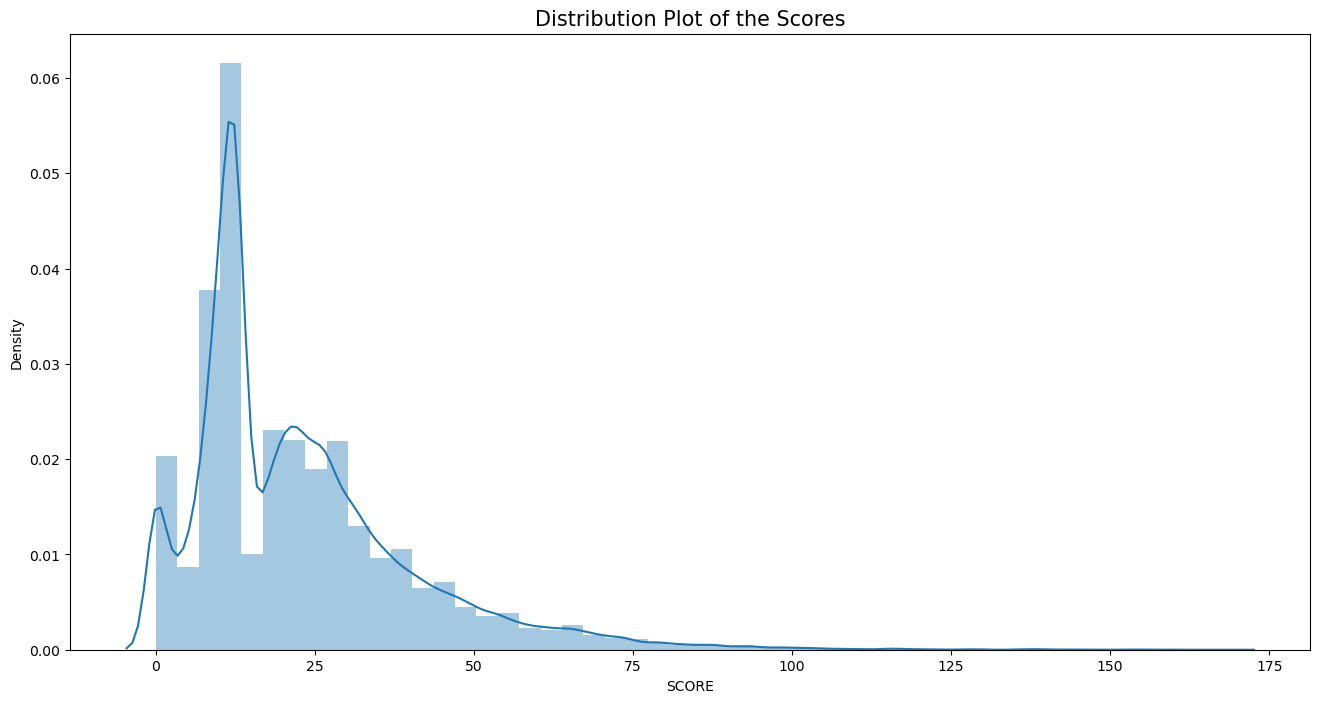

In [11]:
# Have a look at a distribution plot of the Score
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
sns.distplot(rd.SCORE.dropna())
plt.title("Distribution Plot of the Scores", fontsize=15);

In [12]:
# Filter rows where 'BORO' is 0
f_df = rd[rd['BORO'] != '0']

# Display the filtered DataFrame
print(f_df)

           CAMIS                          DBA           BORO BUILDING  \
0       50129800                          NaN      Manhattan     1164   
1       50126573                          NaN      Manhattan     42 W   
2       50098126              HUMAN RESOURCES      Manhattan       26   
3       50112175             BLACK LAB COFFEE      Manhattan      420   
4       50139124                          NaN         Queens     3302   
...          ...                          ...            ...      ...   
206671  50059251              GREGORYS COFFEE      Manhattan      485   
206672  40797031         PICANTERIA EL AUSTRO         Queens     3708   
206673  50129402            HONG KONG KEI ONE  Staten Island     4207   
206674  50012080                      CHILO'S       Brooklyn      323   
206675  50078937  THE MEZZANINE, THE BACKYARD       Brooklyn       97   

                   STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
0                1 AVENUE  10065.0               

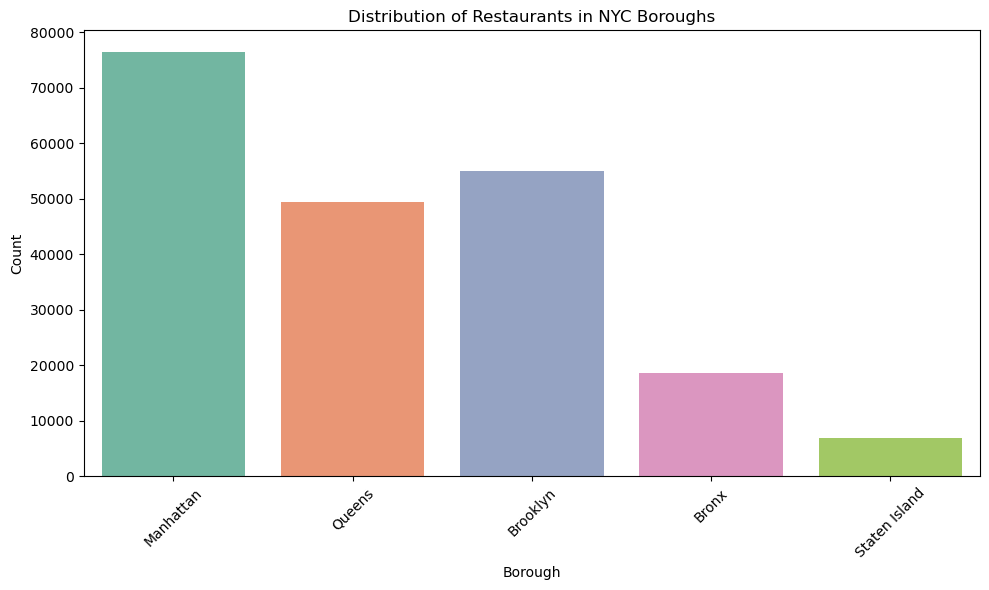

In [13]:
# Visualizing Distribution of Restaurants in NYC Boroughs
plt.figure(figsize=(10, 6))
sns.countplot(data=f_df, x='BORO', palette='Set2') 
plt.title('Distribution of Restaurants in NYC Boroughs')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

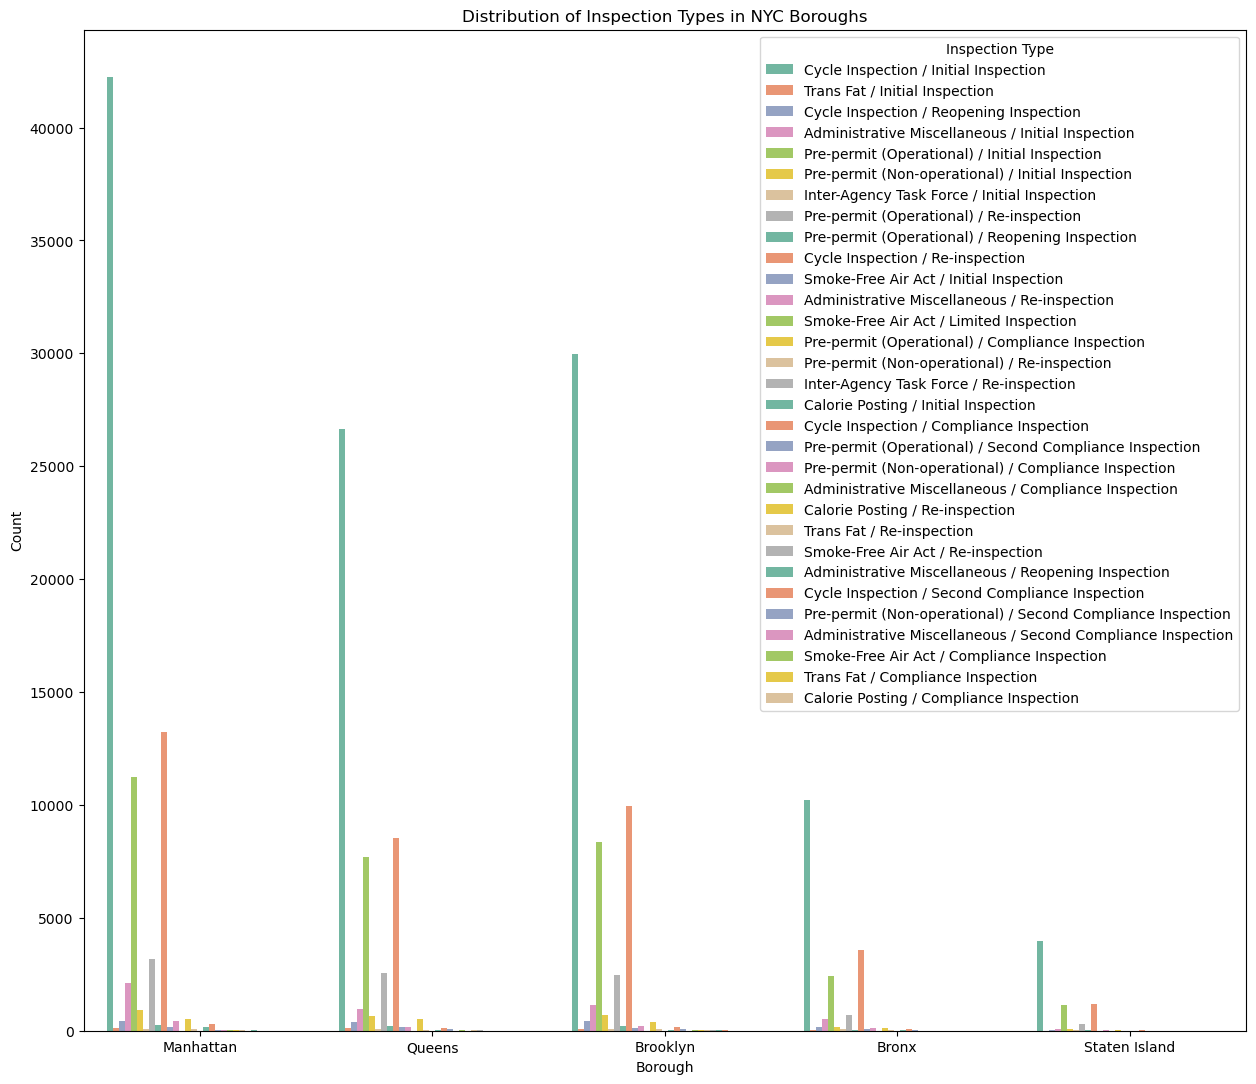

In [36]:
# Create a stacked bar chart using Seaborn
plt.figure(figsize=(15,13))
sns.countplot(x='BORO', hue='INSPECTION TYPE', data=f_df, palette='Set2')
plt.title('Distribution of Inspection Types in NYC Boroughs')
plt.xlabel('Borough')
plt.ylabel('Count')
# Show the plot
plt.legend(title='Inspection Type', bbox_to_anchor=(1, 1), loc='upper right')
plt.show()

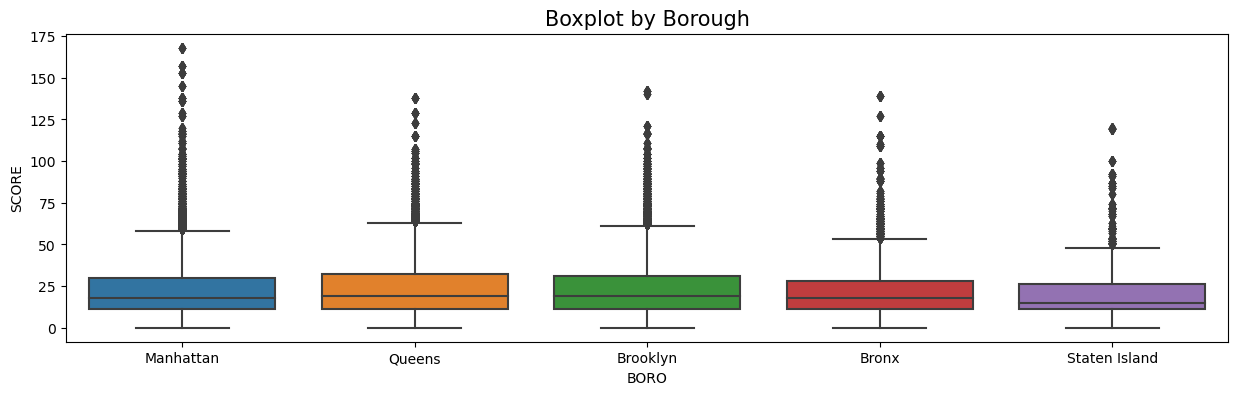

In [37]:
# Create a boxplot using Seaborn
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(x='BORO', y='SCORE', data=f_df)
plt.title('Boxplot by Borough', fontsize=15)

# Show the plot
plt.show()

## **Grade**

In [38]:
# Contingency table for Grade and Borough
boro_grade = pd.crosstab(rd.GRADE, rd.BORO, margins = True)
boro_grade

BORO,Bronx,Brooklyn,Manhattan,Queens,Staten Island,All
GRADE,,,,,,
A,6091,18324,26965,16589,2886,70855
B,1120,2945,3732,2716,370,10883
C,552,1679,2248,1672,115,6266
N,870,2271,3778,2467,355,9741
P,52,170,212,131,10,575
Z,444,921,1302,1224,150,4041
All,9129,26310,38237,24799,3886,102361


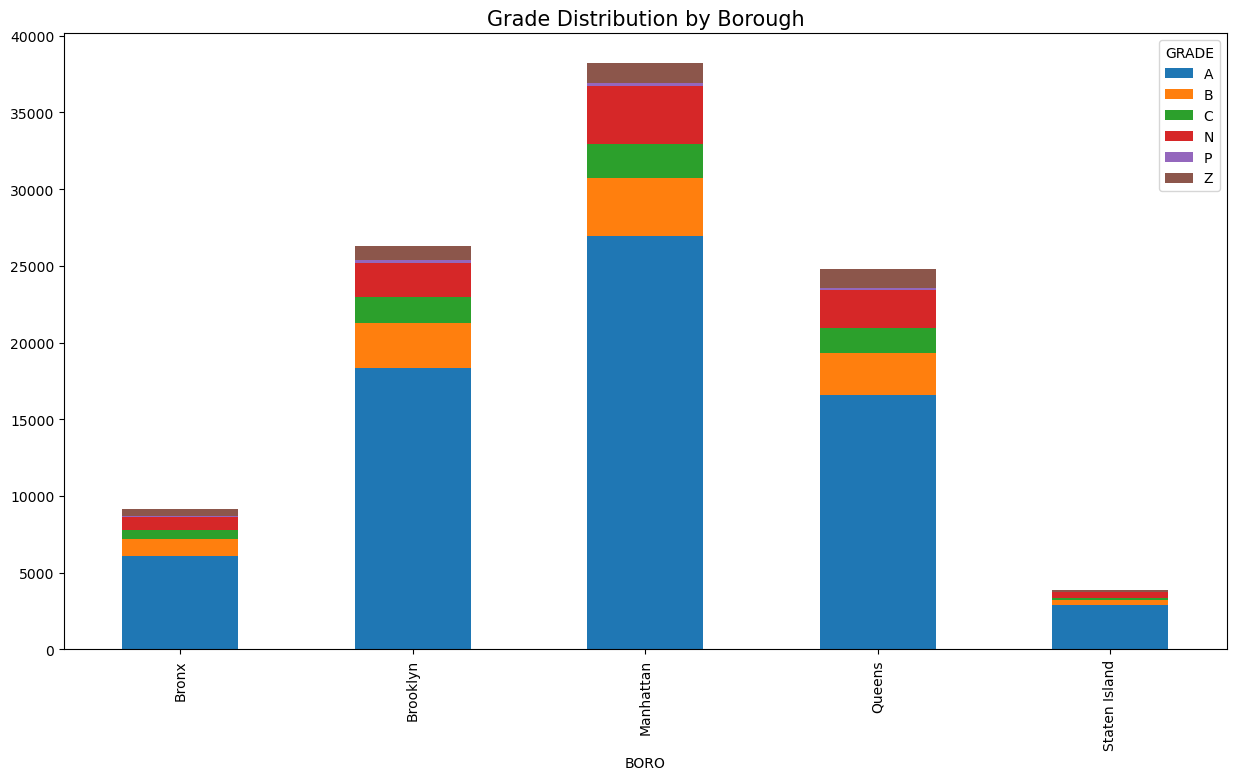

In [40]:
# Plot of grade by borough
pd.crosstab(rd.BORO, rd.GRADE).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Grade Distribution by Borough', fontsize = 15);

# **Perdictive Model Possibility**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset, replace 'your_data.csv' with your data file.
data = pd.read_csv('your_data.csv')

# Assuming your dataset has features like 'feature1', 'feature2', etc., and 'GRADE' as the target variable.
# Replace these with your actual feature and target column names.

# Preprocess the data
X = data[['feature1', 'feature2']]  # Features
y = data['GRADE']  # Target variable

# Encode categorical variables (if needed)
le = LabelEncoder()
X['feature1'] = le.fit_transform(X['feature1'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classification model (Random Forest in this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

# Use the trained model to make predictions on new data
new_data = pd.DataFrame({'feature1': [value1], 'feature2': [value2]})  # Replace with your new data
predicted_grade = model.predict(new_data)
print(f'Predicted Grade: {predicted_grade[0]}')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset, replace 'your_data.csv' with your data file.
data = pd.read_csv('your_data.csv')

# Assuming your dataset has various features and 'GRADE' as the target variable.
# Replace these with your actual feature and target column names.

# Preprocess the data
X = data.drop(columns=['GRADE'])  # Features
y = data['GRADE']  # Target variable

# Handle missing data (you may need more advanced methods)
X.fillna(0, inplace=True)

# Encode categorical variables (if needed)
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (normalize numerical features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose a classification model (Random Forest in this example)
model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV (you may need more parameters)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from hyperparameter tuning
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

# Use the trained model to make predictions on new data
new_data = pd.DataFrame({
    'Feature1': [value1],
    'Feature2': [value2],
    # Add more features as needed
})

# Preprocess new data similarly to training data (handle missing values, encoding, scaling)
new_data.fillna(0, inplace=True)
new_data[categorical_columns] = le.transform(new_data[categorical_columns])
new_data = scaler.transform(new_data)

predicted_grade = best_model.predict(new_data)
print(f'Predicted Grade: {predicted_grade[0]}')